# Case 1

In [89]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
import seaborn as sns
import scipy.linalg as lng
import scipy.io
from sklearn import preprocessing

## Read data

In [2]:
data = pd.read_csv('dataCase1.csv')

In [3]:
data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-4.551892,-1.809625,-0.913360,-0.218107,0.687713,-1.357434,3.087521,0.134304,5.501414,0.480548,...,1.935061,-0.364959,0.228810,-0.145521,-1.754263,B,A,C,C,H
1,1.806876,NaN,-2.067355,-0.259221,1.682711,-0.899337,-0.448752,0.246285,2.007544,1.669644,...,2.129238,2.873889,-0.956736,2.946482,0.348536,B,B,D,B,B
2,-7.418004,3.145955,-1.434793,-2.355750,2.145708,-2.730022,0.181677,-1.603840,1.481230,0.863563,...,3.011292,0.023706,-0.118926,-1.329891,-0.549678,B,B,B,D,E
3,-8.776398,-0.966571,2.768401,-1.016546,2.579520,-2.989883,1.299483,0.537700,1.972970,0.214713,...,2.334895,0.131329,-1.506334,-1.198288,-0.061236,B,B,A,B,D
4,-6.755842,-0.998227,0.657886,-1.104707,1.289966,-3.907128,0.901370,0.497693,1.794773,0.779314,...,3.131590,-1.299633,-0.861064,0.672235,-0.659976,A,C,D,D,D
5,-9.608197,-0.821039,1.551050,0.444680,-0.486051,-1.789884,-0.663241,-0.340686,1.459655,1.187671,...,2.511478,3.341238,0.183425,-0.926873,-0.166359,B,B,B,D,D
6,-7.880446,1.062194,0.767016,-1.253419,0.694371,-2.804062,-0.699389,-1.451358,1.047900,0.449204,...,2.959558,-0.496117,0.689368,-0.857621,-1.273170,B,B,B,A,E
7,-6.824694,-0.728791,0.069527,-2.071430,NaN,-0.411982,-0.198610,-0.120925,2.437306,-0.722936,...,2.529514,-0.600458,-2.068755,-0.126282,0.150750,A,A,D,D,A
8,-8.291015,0.384659,-0.475732,-0.100455,1.017080,-2.670592,0.137553,-0.049582,2.965567,-1.355147,...,1.017245,0.726432,-1.083649,1.545775,0.941172,A,A,C,B,NaN
9,2.178053,0.522873,-1.598506,1.389618,1.228536,-0.362776,2.866099,0.386848,1.540658,0.282538,...,2.489180,1.249810,0.249127,-0.682217,0.723193,A,B,C,A,E


## Work without the NaN values

In [11]:
for col in data.columns:
    print(data.loc[np.isnan(data[col]) == True])

       Y        X1        X2        X3        X4        X5        X6  \
100  NaN  1.198527  4.559634 -0.028007  0.678247 -1.398437  2.251363   
101  NaN -1.678097 -0.280255  2.746946  1.656956 -1.153272  1.714804   
102  NaN  0.492039  2.918478  0.828985  1.722888  1.048289  1.912647   
103  NaN  1.356370 -2.226176 -0.525003  2.748485 -2.368711  1.007910   
104  NaN -1.106479 -0.429998 -0.586983  0.305857 -1.502526 -0.784669   
105  NaN  1.781127  1.225249  1.007033  1.598830  0.541656 -2.579786   
106  NaN  0.038402 -1.597729 -0.997141  1.409106 -1.772965  1.346206   
107  NaN -0.127882  0.889384 -2.254493  0.622136 -1.633340  1.502921   
108  NaN  0.822378 -2.104478  1.594374  0.792520 -0.839497  0.850772   
109  NaN -0.581750  1.442742 -0.330471  1.173408 -2.263250  0.040534   
110  NaN  0.976199 -0.567030 -2.525858  2.500462 -0.865530  0.550688   
111  NaN  0.477435 -0.329606 -0.637425  2.258057 -3.386475 -0.280863   
112  NaN -0.036873  0.639765  0.220243  1.072019 -2.678516 -1.99

       Y        X1        X2        X3        X4        X5        X6  \
135  NaN  1.055781 -1.241645 -0.334510 -0.145388 -2.647467  0.180802   
287  NaN -1.617096  2.164282  0.003697  0.977887 -2.363827  0.613504   
445  NaN -0.850956 -0.613547 -1.875623  0.626733 -2.302550  1.215360   
549  NaN  0.492153  0.566249 -0.111897  0.982241 -0.204836  1.440819   
612  NaN  0.488098  0.936507 -0.733525  2.793114 -1.606915  0.402119   
669  NaN  1.925082 -0.857947  0.663501  0.612638  0.461634  1.022555   
730  NaN -0.700814 -1.081920 -1.469598  0.457311 -3.169312  1.277459   
757  NaN -0.353052 -0.044569  0.496903  1.755926 -0.722572  0.898893   
796  NaN  1.090816 -0.222395  0.530529  0.198755 -1.754700  2.489779   
816  NaN  2.979722 -0.829207 -0.191440  2.337820 -0.968902  1.202535   
905  NaN  0.733461  0.545834 -1.216140  1.937414 -1.532479  1.018052   
915  NaN -0.220773  0.358230  0.865738  1.815800 -0.498215  0.340109   
959  NaN -0.233620  2.455507 -0.395993  1.021586 -1.695751  0.88

             Y        X1        X2        X3        X4        X5        X6  \
18   -0.794658  1.717198  0.414675  0.987880 -0.073038 -1.487149 -0.713262   
230        NaN  1.095044  0.826440 -1.363635  0.946352 -3.081579  1.198249   
383        NaN -2.119674 -0.139738 -0.387779  1.041972 -2.068790  0.165868   
523        NaN  0.321336  2.524852 -0.270917  1.184830 -0.562581  1.463921   
615        NaN  0.935797 -1.135377 -1.450507  2.916794 -1.576371  2.675258   
782        NaN  0.728427  0.653833  0.398767  0.771369 -2.081279  2.046690   
787        NaN -0.377802 -1.103501  0.246459  0.348670 -2.318601 -0.421214   
997        NaN  1.138615  0.898425 -1.290124  1.368047 -4.158679  0.247768   
1009       NaN  1.068869 -1.176720 -1.202360  0.909730 -3.062582  1.389396   
1061       NaN  0.236431  0.521060 -0.958496  1.318485 -0.946324 -0.186799   

            X7        X8        X9  ...       X91       X92       X93  \
18   -0.411600  1.752704 -0.001218  ...  1.387245  0.415999 -0.13909

             Y        X1        X2        X3        X4        X5        X6  \
10   -2.503041  2.899399 -0.310392 -0.159615  1.598840 -1.064394  3.212662   
197        NaN -0.690448  1.717374 -1.011317  2.058230       NaN  0.444406   
304        NaN  0.370733 -0.755483 -0.564511  1.651311       NaN -0.242034   
448        NaN  1.467310 -1.062137  1.373562  2.039396 -1.054469 -0.650345   
541        NaN  1.208393 -0.206085 -0.687741  1.039293 -2.179575  3.049190   
549        NaN  0.492153  0.566249 -0.111897  0.982241 -0.204836  1.440819   
714        NaN -1.726325  0.194628  0.082004  3.303979 -1.400867  2.779704   
1006       NaN  1.284002 -0.666978       NaN  1.306869 -1.451841 -1.383492   

            X7        X8        X9  ...       X91       X92       X93  \
10   -0.143713  2.962160 -0.061982  ...  2.529409       NaN -0.366617   
197   0.498306  1.801506 -0.766731  ...  2.305383 -0.417728 -0.855853   
304  -1.201702  1.847600  0.380512  ...  3.433848  1.139711  1.100511   
448  

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Mean and standard deviation of each continuous variable

In [28]:
substitute_values_column = {}
for col in data.columns:
    if data[col].dtype != 'object' and col != 'Y':
       substitute_values_column[col] = np.mean(data[col].dropna())/np.std(data[col].dropna())

In [59]:
data1 = data.copy()
data1 = data1.fillna(value=substitute_values_column)
data1

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-4.551892,-1.809625,-0.913360,-0.218107,0.687713,-1.357434,3.087521,0.134304,5.501414,0.480548,...,1.935061,-0.364959,0.228810,-0.145521,-1.754263,B,A,C,C,H
1,1.806876,0.407311,-2.067355,-0.259221,1.682711,-0.899337,-0.448752,0.246285,2.007544,1.669644,...,2.129238,2.873889,-0.956736,2.946482,0.348536,B,B,D,B,B
2,-7.418004,3.145955,-1.434793,-2.355750,2.145708,-2.730022,0.181677,-1.603840,1.481230,0.863563,...,3.011292,0.023706,-0.118926,-1.329891,-0.549678,B,B,B,D,E
3,-8.776398,-0.966571,2.768401,-1.016546,2.579520,-2.989883,1.299483,0.537700,1.972970,0.214713,...,2.334895,0.131329,-1.506334,-1.198288,-0.061236,B,B,A,B,D
4,-6.755842,-0.998227,0.657886,-1.104707,1.289966,-3.907128,0.901370,0.497693,1.794773,0.779314,...,3.131590,-1.299633,-0.861064,0.672235,-0.659976,A,C,D,D,D
5,-9.608197,-0.821039,1.551050,0.444680,-0.486051,-1.789884,-0.663241,-0.340686,1.459655,1.187671,...,2.511478,3.341238,0.183425,-0.926873,-0.166359,B,B,B,D,D
6,-7.880446,1.062194,0.767016,-1.253419,0.694371,-2.804062,-0.699389,-1.451358,1.047900,0.449204,...,2.959558,-0.496117,0.689368,-0.857621,-1.273170,B,B,B,A,E
7,-6.824694,-0.728791,0.069527,-2.071430,1.298740,-0.411982,-0.198610,-0.120925,2.437306,-0.722936,...,2.529514,-0.600458,-2.068755,-0.126282,0.150750,A,A,D,D,A
8,-8.291015,0.384659,-0.475732,-0.100455,1.017080,-2.670592,0.137553,-0.049582,2.965567,-1.355147,...,1.017245,0.726432,-1.083649,1.545775,0.941172,A,A,C,B,NaN
9,2.178053,0.522873,-1.598506,1.389618,1.228536,-0.362776,2.866099,0.386848,1.540658,0.282538,...,2.489180,1.249810,0.249127,-0.682217,0.723193,A,B,C,A,E


### variance differences vector

In [62]:
dic_size = len(substitute_values_column)
var_diff = np.zeros(dic_size)
i = 0
for col in substitute_values_column.keys():
    var_diff[i] = np.var(data[col].dropna())-np.var(data1[col])
    i += 1
    
var_diff

array([0.00848986, 0.04063082, 0.01485237, 0.00973102, 0.01410348,
       0.02471981, 0.00830184, 0.01132441, 0.01910939, 0.01024759,
       0.00993706, 0.01573675, 0.00592661, 0.0125642 , 0.00468853,
       0.01115795, 0.01708808, 0.01460777, 0.0152981 , 0.00765464,
       0.01789143, 0.00935386, 0.01417052, 0.0141837 , 0.0113531 ,
       0.01161186, 0.01955449, 0.00740087, 0.01006901, 0.01339178,
       0.01141937, 0.01408993, 0.01408354, 0.00355894, 0.00999506,
       0.01747702, 0.00334479, 0.01353838, 0.01814565, 0.01130406,
       0.01636249, 0.00528715, 0.01549381, 0.00909119, 0.01339886,
       0.01632178, 0.01294377, 0.01410538, 0.01172854, 0.00848184,
       0.01520793, 0.01448289, 0.01884069, 0.01711426, 0.0117476 ,
       0.0086    , 0.00933803, 0.01051871, 0.00867996, 0.01336826,
       0.00962878, 0.01549697, 0.01540193, 0.01437419, 0.01605662,
       0.01288115, 0.00461696, 0.01221341, 0.01909092, 0.010033  ,
       0.007376  , 0.01785769, 0.00589789, 0.0079997 , 0.01443

### Correlation matrix between the continuous variables

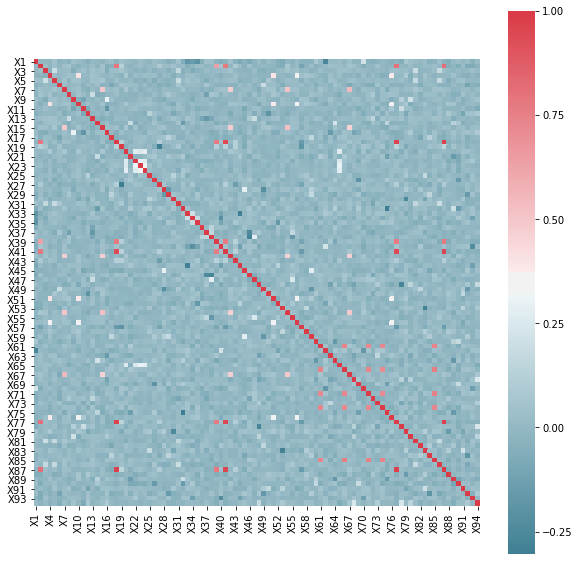

In [90]:
cont_df = data1.iloc[:,1:95]
f, ax = plt.subplots(figsize=(10, 10))
corr_mat1 =cont_df.corr()
sns.heatmap(corr_mat1, mask=np.zeros_like(corr_mat1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

### PCA with the continuous variables

### Categorical variable missing data

In [47]:
for col in data.columns:
    if data[col].dtype == 'object':
       print(data[col].describe()) 

count     1088
unique       2
top          B
freq       578
Name: X96, dtype: object
count     1085
unique       3
top          B
freq       381
Name: X97, dtype: object
count     1087
unique       4
top          D
freq       336
Name: X98, dtype: object
count     1093
unique       4
top          D
freq       327
Name: X99, dtype: object
count     1091
unique       8
top          D
freq       153
Name: X100, dtype: object
